In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import io
import requests 
import datetime

In [3]:
url="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df=pd.read_csv(url)

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df1=df.reset_index()['Open']

In [6]:
df1

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

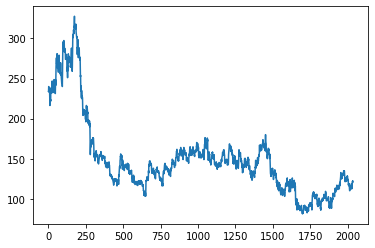

In [7]:
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [10]:
train_size=int(len(df1)*0.75)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [11]:
train_size,test_size

(1526, 509)

In [12]:
train_data,test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]),
 array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.097120

In [13]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return numpy.array(train_X), numpy.array(train_Y)

In [14]:
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(1425, 100)
(1425,)


(None, None)

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 9s 199ms/step - loss: 0.0136 - val_loss: 0.0033
Epoch 2/100
23/23 [==============================] - 3s 143ms/step - loss: 0.0022 - val_loss: 8.2428e-04
Epoch 3/100
23/23 [==============================] - 3s 141ms/step - loss: 0.0016 - val_loss: 9.9174e-04
Epoch 4/100
23/23 [==============================] - 3s 145ms/step - loss: 0.0014 - val_loss: 8.9588e-04
Epoch 5/100
23/23 [==============================] - 3s 143ms/step - loss: 0.0013 - val_loss: 9.2092e-04
Epoch 6/100
23/23 [==============================] - 3s 141ms/step - loss: 0.0013 - val_loss: 9.2746e-04
Epoch 7/100
23/23 [==============================] - 3s 142ms/step - loss: 0.0012 - val_loss: 9.2651e-04
Epoch 8/100
23/23 [==============================] - 4s 155ms/step - loss: 0.0012 - val_loss: 8.4483e-04
Epoch 9/100
23/23 [==============================] - 3s 145ms/step - loss: 0.0010 - val_loss: 9.0881e-04
Epoch 10/100
23/23 [==============================] - 3s 14

23/23 [==============================] - 3s 150ms/step - loss: 2.7515e-04 - val_loss: 2.8550e-04
Epoch 77/100
23/23 [==============================] - 3s 142ms/step - loss: 2.9054e-04 - val_loss: 2.8985e-04
Epoch 78/100
23/23 [==============================] - 3s 148ms/step - loss: 2.7248e-04 - val_loss: 3.5261e-04
Epoch 79/100
23/23 [==============================] - 3s 147ms/step - loss: 3.2183e-04 - val_loss: 3.0407e-04
Epoch 80/100
23/23 [==============================] - 3s 149ms/step - loss: 2.8822e-04 - val_loss: 2.9477e-04
Epoch 81/100
23/23 [==============================] - 3s 146ms/step - loss: 2.6171e-04 - val_loss: 2.7213e-04
Epoch 82/100
23/23 [==============================] - 3s 152ms/step - loss: 2.6378e-04 - val_loss: 2.4970e-04
Epoch 83/100
23/23 [==============================] - 3s 152ms/step - loss: 2.8813e-04 - val_loss: 3.3766e-04
Epoch 84/100
23/23 [==============================] - 4s 155ms/step - loss: 3.1643e-04 - val_loss: 2.2479e-04
Epoch 85/100
23/23 [===

In [21]:
import tensorflow as tf

In [22]:
tf.__version__

'2.7.0'

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.94579759645148

In [26]:
math.sqrt(mean_squared_error(ytest,test_predict))

106.77456749953468

In [27]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [28]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

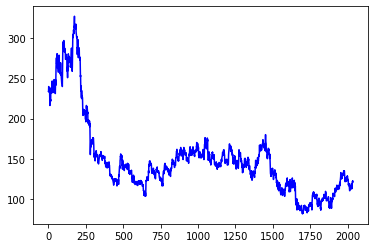

In [29]:
plt.plot(scaler.inverse_transform(df1),color='blue')
plt.show()

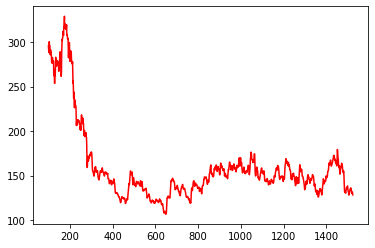

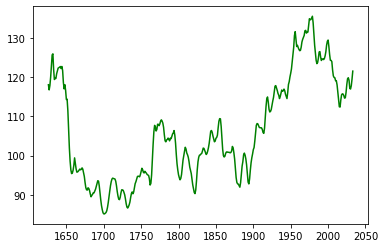

In [30]:
plt.plot(trainPredictPlot,color='red')
plt.show()
plt.plot(testPredictPlot,color='green')
plt.show()

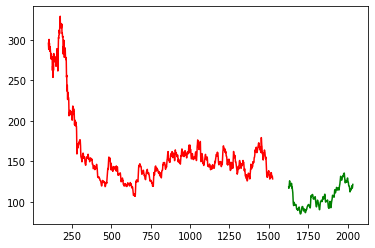

In [31]:
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

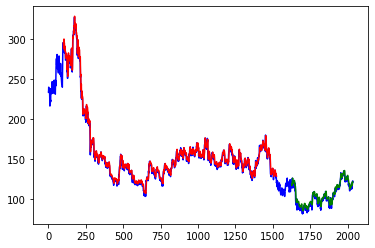

In [32]:
plt.plot(scaler.inverse_transform(df1),color='blue')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [33]:
len(test_data)

509

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 168)

In [35]:
model.save("saved_model.h5")